In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def read_images(left_image_path, right_image_path):
    left_img = cv2.imread(left_image_path)
    right_img = cv2.imread(right_image_path)
    return left_img, right_img

def compute_disparity(left_img, right_img):
    gray_left = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

    # 初始化StereoSGBM匹配器
    window_size = 5
    min_disp = 0
    num_disp = 16 * 6
    stereo = cv2.StereoSGBM_create(minDisparity=min_disp,
                                   numDisparities=num_disp,
                                   blockSize=window_size,
                                   P1=8 * 3 * window_size ** 2,
                                   P2=32 * 3 * window_size ** 2,
                                   disp12MaxDiff=1,
                                   uniquenessRatio=15,
                                   speckleWindowSize=100,
                                   speckleRange=32)

    # 计算视差图
    disparity = stereo.compute(gray_left, gray_right).astype(np.float32) / 16.0
    return disparity

In [7]:
def visualize_disparity(disparity):
    # 归一化视差图用于显示
    disp = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    disp = np.uint8(disp)
    
    # 显示视差图
    plt.imshow(disp, cmap='plasma')
    plt.colorbar()
    plt.show()

    # 保存视差图
    cv2.imwrite('disparity.jpg', disp)

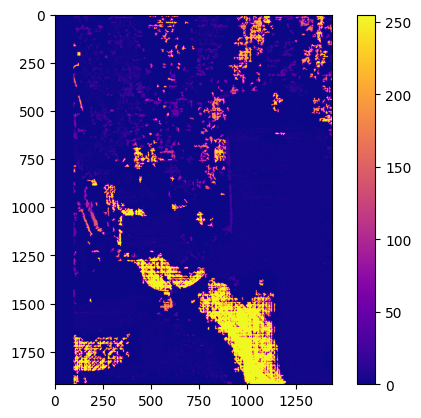

In [8]:
left_image_path = 'left.jpg'
right_image_path = 'right.jpg'

# 读取图像
left_img, right_img = read_images(left_image_path, right_image_path)

# 计算视差图
disparity = compute_disparity(left_img, right_img)

# 可视化视差图
visualize_disparity(disparity)